## Observations and Insights 

1. There is a strong positive correlation of 0.84 between average tumor volume and weight within the subject mice,  with strong regression coefficient of 0.95.
2. Capomulin and Ramicane yielded high data values of 230 and 228 respectively  and considered most recognised regimen fpr treatment of tumors.
3. The average data points for all regimen are appropximately bteween 40.2 and 54.3.
4. There is an approximate distribution of male (50.61%) and female (49.39%) out of 249 mice dataset.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import sklearn.datasets as dta

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Display mice data to check details of data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Display study results data to check details
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
Combined_data_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

In [7]:
# Display the data table for preview
Combined_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [8]:
# Checking the number of mice.
Total_number_of_mice = Combined_data_df["Mouse ID"].nunique()
Total_number_of_mice

249

In [9]:
# Display combined data prior to droping duplications
Combined_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice = Combined_data_df[Combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
Duplicate_mice.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_mice = Combined_data_df.loc[Combined_data_df["Mouse ID"] == "g989"]
Duplicate_mice.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Combined_data_df = Combined_data_df[Combined_data_df["Mouse ID"].isin(Duplicate_mice)==False]
Clean_Combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
Clean_Combined_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [14]:
# Show the total number of mice in clean data
Total_number_of_cleanmice = Clean_Combined_data_df["Mouse ID"].nunique()
Total_number_of_cleanmice

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Regimen = Clean_Combined_data_df.groupby("Drug Regimen")
Regimen 

print(Regimen["Drug Regimen"].count())
mean = round(Regimen['Tumor Volume (mm3)'].mean(), 2)
median = round(Regimen['Tumor Volume (mm3)'].median(), 2)
variance = round(Regimen['Tumor Volume (mm3)'].var(), 3)
stdev = round(Regimen['Tumor Volume (mm3)'].std(), 3)
sem = round(Regimen['Tumor Volume (mm3)'].sem(), 3)

Statistical_summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":stdev,"SEM":sem})
Statistical_summary_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.948,4.995,0.329
Ceftamin,52.59,51.78,39.290,6.268,0.470
Infubinol,52.88,51.82,43.129,6.567,0.492
Ketapril,55.24,53.70,68.554,8.280,0.604
Naftisol,54.33,52.51,66.173,8.135,0.596
Placebo,54.03,52.29,61.168,7.821,0.581
Propriva,52.32,50.85,42.351,6.508,0.513
Ramicane,40.22,40.67,23.487,4.846,0.321
Stelasyn,54.23,52.43,59.451,7.710,0.573


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

Statistical_summary_df.agg = Clean_Combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
Statistical_summary_df.agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

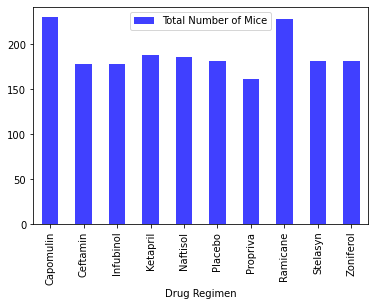

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Regimen = Clean_Combined_data_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()

Plot_chart = pd.DataFrame({'Drug Regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                                   'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
                  'Total Number of Mice': [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]})
ax = Plot_chart.plot.bar(x= 'Drug Regimen', y= 'Total Number of Mice', rot=90, alpha=0.75, facecolor='blue')


(0.0, 240.0)

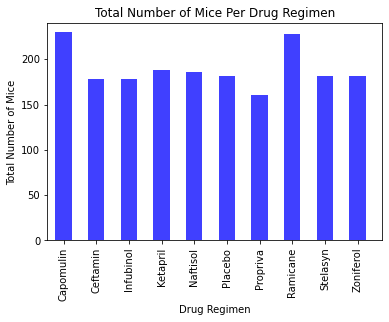

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

Regimen = Clean_Combined_data_df.groupby("Drug Regimen")["Mouse ID"].nunique()

Total_numb_mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(Regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                                   'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')

plt.title("Total Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")


plt.bar(x_axis, Total_numb_mice, alpha=0.75, align="center", width=0.5, facecolor='blue')

plt.xlim(-0.5, len(x_axis)-0.25)
plt.ylim(0, max(Total_numb_mice)+10)


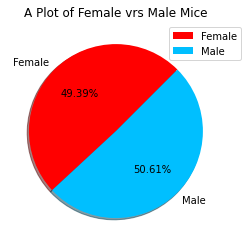

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_sex = Clean_Combined_data_df.groupby(["Sex"]).count()

mice_piepd = Mouse_sex.plot(kind="pie", y='Mouse ID', title=("A Plot of Female vrs Male Mice"),
                            colors = ["red","deepskyblue"],autopct = "%1.2f%%", shadow = True,startangle=45)
mice_piepd.set_ylabel("")
mice_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.1, 1))

Male      958
Female    935
Name: Sex, dtype: int64

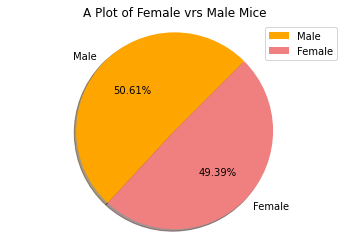

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Mouse_sex = Clean_Combined_data_df["Sex"].value_counts()

explode = (0,0)
colors =["orange", "lightcoral"]
labels = list(Mouse_sex.index)

plt.pie(Mouse_sex,  labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=45) 

plt.title('A Plot of Female vrs Male Mice',fontsize=12)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
Mouse_sex

In [21]:
# Display data point by sex
bysex = mouse_metadata.groupby("Sex").count()
bysex 

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

Maximum_timepoint=Clean_Combined_data_df.groupby(['Mouse ID'])['Timepoint'].max()
Maximum_timepoint 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_volume_df = pd.merge(Maximum_timepoint, Clean_Combined_data_df, on=(["Mouse ID","Timepoint"]))
Tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

Capomulin_df = Combined_data_df.loc[Combined_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data_df.loc[Combined_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data_df.loc[Combined_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data_df.loc[Combined_data_df["Drug Regimen"] == "Ceftamin", :]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [24]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Display list of Capomulin

Capomulin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [25]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Display list of ramicane

Ramicane = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [26]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Display list of Infubinol

Infubinol = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [27]:
# Display list of Ceftamin

Ceftamin = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin
Tumor1 = Capomulin_merge["Tumor Volume (mm3)"]
Quartiles1 = Tumor1.quantile([0.25,0.5,0.75])
Lowerq1 = Quartiles1[0.25]
Upperq1 = Quartiles1[0.75]
IQR1 = Upperq1-Lowerq1

#Ramicane
Tumor2 = Ramicane_merge["Tumor Volume (mm3)"]
Quartiles2 = Tumor2.quantile([0.25,0.5,0.75])
Lowerq2 = Quartiles2[0.25]
Upperq2 = Quartiles2[0.75]
IQR2 = Upperq2-Lowerq2

#Infubinol
Tumor3 = Infubinol_merge["Tumor Volume (mm3)"]
Quartiles3 = Tumor3.quantile([0.25,0.5,0.75])
Lowerq3 = Quartiles3[0.25]
Upperq3 = Quartiles3[0.75]
IQR3 = Upperq3-Lowerq3

#Ceftamin
Tumor4 = Ceftamin_merge["Tumor Volume (mm3)"]
Quartiles4 = Tumor4.quantile([0.25,0.5,0.75])
Lowerq4 = Quartiles4[0.25]
Upperq4 = Quartiles4[0.75]
IQR4 = Upperq4-Lowerq4


# Determine outliers using upper and lower bounds
Lower_bound1 = Lowerq1 - (1.5*IQR1)
Upper_bound1 = Upperq1 + (1.5*IQR1)

Lower_bound2 = Lowerq2 - (1.5*IQR2)
Upper_bound2 = Upperq2 + (1.5*IQR2)

Lower_bound3 = Lowerq3 - (1.5*IQR3)
Upper_bound3 = Upperq3 + (1.5*IQR3)

Lower_bound4 = Lowerq4 - (1.5*IQR4)
Upper_bound4 = Upperq4 + (1.5*IQR4)

# Print outliers

print(f"Capomulin potential outliers could be values below {Lower_bound1} and above {Upper_bound1} could be outliers.")
print(f"Ramicane potential outliers could be values below {Lower_bound2} and above {Upper_bound2} could be outliers.")
print(f"Infubinol potential outliers could be values below {Lower_bound3} and above {Upper_bound3} could be outliers.")
print(f"Ceftamin potential outliers could be values below {Lower_bound4} and above {Upper_bound4} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


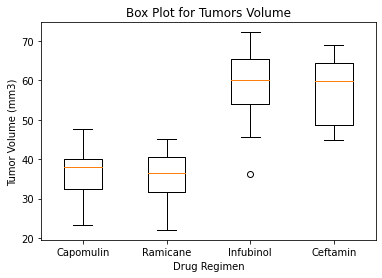

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Boxplot_data = [Tumor1, Tumor2, Tumor3, Tumor4]

Marker = dict(markerfacecolor="b",Marker="*", markeredgecolor="c")

fig1, ax1 = plt.subplots()
ax1.set_title("Box Plot for Tumors Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(Boxplot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

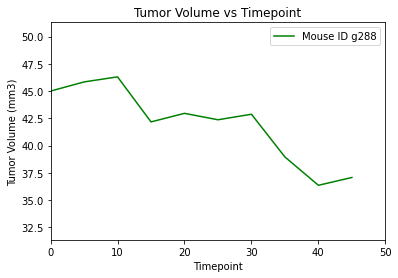

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find any mouse

Any_mouse = (Clean_Combined_data_df[Clean_Combined_data_df["Drug Regimen"]=="Capomulin"]).sample()
Any_data = pd.merge(Clean_Combined_data_df, Any_mouse, on="Mouse ID", how="inner")
Any_df = Any_data.drop([col for col in Any_data.columns if '_y' in col], axis=1)

Time = Any_df["Timepoint_x"]
Vol = Any_df["Tumor Volume (mm3)_x"]
Label = Any_df["Mouse ID"].unique()

#print(random_mouse["Mouse ID"])
line, = plt.plot(Time, Vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, Time.max() + 5)
plt.ylim(Vol.min() - 5, Vol.max() + 5)
plt.legend("Mouse ID " + Label)
plt.show()

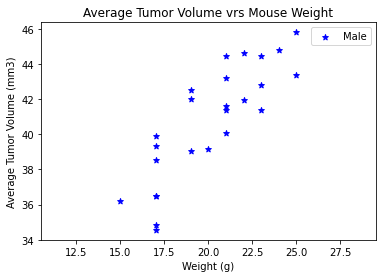

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'], marker="*", facecolors="blue", edgecolors="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vrs Mouse Weight")

plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


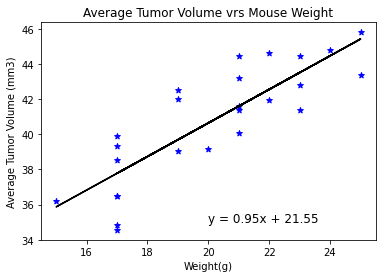

In [33]:
#2 Calculate the correlation coefficient and linear regression model 
Model=st.linregress(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
Model

x_values = Capomulin_avg['Weight (g)']
y_values = Capomulin_avg['Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, std_err = st.linregress(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'])

regress_values = x_values * slope + intercept
line = slope * Capomulin_avg['Weight (g)'] + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

print(line_eq)
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'], marker="*", facecolors="blue", edgecolors="blue")
plt.annotate(line_eq, (20,35), fontsize=12, color="black")

plt.plot(Capomulin_avg['Weight (g)'], line,color="black")


print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vrs Mouse Weight")



plt.savefig('linearregression')
plt.show()

